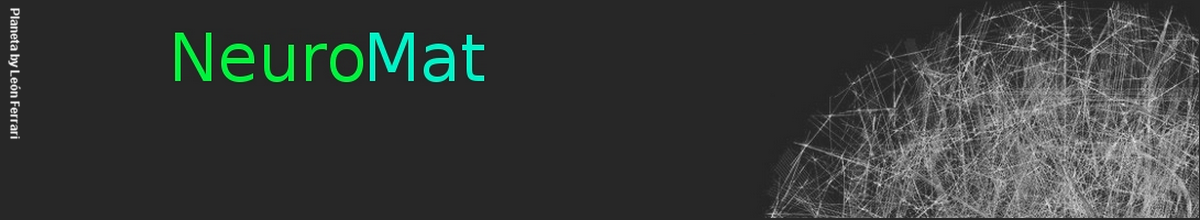

In [2]:
from IPython.display import Image
Image("img/neuromat.png", width=1000, height=1300)


In [4]:
import requests
import json
import numpy as np
import pandas as pd
import urllib.parse
from IPython.core.display import display, HTML
from IPython.display import IFrame

display(HTML("<html><head><title>NeuroMat</title></head>"))

display(HTML("<font size='+3'><strong>NeuroMat</strong> </font> <font size='+2'>( Centro de Pesquisa, Inovação e Difusão em Neuromatemática )</font>"))


In [5]:

baseurl='https://query.wikidata.org/embed.html#'

url = "https://query.wikidata.org/sparql"
query = """SELECT distinct  (COUNT(?autores) AS ?Pesquisadores) 
  WHERE {   
    ?artigos wdt:P2860 wd:Q56592766.    
    ?artigos wdt:P361 wd:Q18477654; wdt:P50 ?autores.
  }"""
params = {
    "query": query,
    "format": "json"
}


result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
pesquisadores = data['results']['bindings'][0]['Pesquisadores']['value']

url = "https://query.wikidata.org/sparql"
query = """SELECT distinct  (COUNT(?artigos) AS ?Artigos) WHERE {
  ?artigos wdt:P361 wd:Q18477654.
  ?artigos wdt:P2860 wd:Q56592766.   
}"""
params = {
    "query": query,
    "format": "json"
}


result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

artigos = data['results']['bindings'][0]['Artigos']['value']

In [6]:

text1 = "&nbsp; O artigo <a href='https://www.wikidata.org/wiki/Q56592766' target='_blank'>Infinite Systems of Interacting Chains with Memory of Variable Length—A Stochastic Model for Biological Neural Nets</a>,  escrito por "

text2 =  " <a href='https://www.wikidata.org/wiki/Q17489997' target='_blank' >Antonio Galves</a> "

E = " e "

text3 =  " <a href='https://www.wikidata.org/wiki/Q59267761' target='_blank' >Eva Löcherbach</a> "
 
text4 = " em 2013, constitui a pedra angular do <a href='https://www.wikidata.org/wiki/Q18477654' target='_blank' >Centro de Pesquisa, Inovação e Difusão em Neuromatemática (CEPID NeuroMat). </a>"

text5 = "Este trabalho introduziu um novo modelo para redes neurais e lançou uma nova linha de investigação. "

paragrafo1 =  text1 + text2 + E +text3 + text4 + text5

display(HTML("<font size='+0.8'>" + paragrafo1 + "</font>"))


In [7]:
def wdq(query='',width=600,height=500):
  return IFrame(baseurl+urllib.parse.quote(query), width=width, height=height)

query = """SELECT distinct (?artigos as ?QID) ?artigosLabel   WHERE {
  ?artigos wdt:P921 wd:Q24575409.   
   SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }                         
}"""

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

revistas = data['results']['bindings'] 
tam = len(revistas)
 

revistas_parceiras = "<a href='" + revistas[0]['QID']['value']+ "' target='_blank' >" + revistas[0]['artigosLabel']['value'] + "</a>"


for i in range(1, tam):    
    if (tam - i) == 1:
      revistas_parceiras = revistas_parceiras + " e <a href='" + revistas[i]['QID']['value']+ "' target='_blank'  > " + revistas[i]['artigosLabel']['value'] + "</a>"
    else:
      revistas_parceiras = revistas_parceiras + ", <a href='" + revistas[i]['QID']['value']+"'  target='_blank' > " + revistas[i]['artigosLabel']['value'] + "</a>"
    
    
text6 = " &nbsp; No contexto do CEPID NeuroMat, participaram desta linha  %s pesquisadores que produziram %s artigos com base no modelo de 2013 ou contribuições posteriores. "
paragrafo11 = text6 % (pesquisadores, artigos)
paragrafo12 = "O modelo fundador do NeuroMat, chamado <a href='https://www.wikidata.org/wiki/Q24575409'>Modelo Galves-Löcherbach</a>, foi também o objeto de análise de publicações não filiadas ao NeuroMat, como: "
paragrafo11 = paragrafo11 + paragrafo12 + revistas_parceiras +". "

 
display(HTML("<font size='+0.8'>" + paragrafo11 + " </font>"))

    

In [8]:
wdq(width=700,height=500,query="""#defaultView:Graph
SELECT DISTINCT ?Artigo (?Nome_do_artigo AS ?ArtigoLabel) ?rgb ?Artigo_citado ?Num_citações
WITH { # Get articles only once. While here, take the max_order of the authors (P50 and P2093)
  SELECT ?Artigo (max(?ordem_p50) AS ?ordem_max_p50) (max(?ordem_p2093) AS ?ordem_max_p2093) WHERE {        
    ?Artigo wdt:P361 wd:Q18477654.
    ?Artigo wdt:P2860 wd:Q56592766.
    OPTIONAL {?Artigo p:P50 ?autor_p50. ?autor_p50 pq:P1545 ?ordem_p50}
    OPTIONAL {?Artigo p:P2093 ?autor_p2093. ?autor_p2093 pq:P1545 ?ordem_p2093}
  } GROUP BY ?Artigo
} AS %artigos
WITH { # From the max_order gotten earlier, select the maximun between them
  SELECT ?Artigo ?O_max WHERE {
    INCLUDE %artigos.
    BIND(IF(BOUND(?ordem_max_p50),
            IF(BOUND(?ordem_max_p2093),
               IF(?ordem_max_p50 <= ?ordem_max_p2093, STR(?ordem_max_p2093), STR(?ordem_max_p50)),
               STR(?ordem_max_p50)),
            STR(?ordem_max_p2093)) AS ?O_max)
  }
} AS %ordem
WITH { # Now, with the articles in hand, get the first author (assuming here that there is at least one filled)
  # and get, if exists, the name of the second author.
  SELECT ?Artigo ?autor1Label ?autor2Label ?O_max WHERE {
    INCLUDE %ordem.
    {?Artigo p:P50 ?autor_. ?autor_ ps:P50 ?autor1. ?autor_ pq:P1545 '1'.}
    UNION
    {?Artigo p:P2093 ?autor_. ?autor_ ps:P2093 ?autor1. ?autor_ pq:P1545 '1'.}
    
    OPTIONAL{{?Artigo p:P50 ?autor__. ?autor__ ps:P50 ?autor2. ?autor__ pq:P1545 '2'.}
             UNION
             {?Artigo p:P2093 ?autor__. ?autor__ ps:P2093 ?autor2. ?autor__ pq:P1545 '2'.}}
    
    SERVICE wikibase:label {bd:serviceParam wikibase:language '[AUTO_LANGUAGE],pt-br,pt,en,es,fr,de,ja'.
                            ?autor1 rdfs:label ?autor1Label.
                            ?autor2 rdfs:label ?autor2Label.}
  }
} AS %autores
WITH { # Get the last name of the authors
  SELECT ?Artigo ?Autor1_nome ?Autor2_nome ?O_max WHERE {
    INCLUDE %autores.
    BIND(REPLACE(STR(?autor1Label),REPLACE(str(?autor1Label),'[^ ]*$',''),'') AS ?Autor1_nome)
    BIND(REPLACE(STR(?autor2Label),REPLACE(str(?autor2Label),'[^ ]*$',''),'') AS ?Autor2_nome)
  }
} AS %nome_autores
WITH {
  SELECT ?Artigo (COUNT(?Artigo_citando) AS ?Num_citações) WHERE {
    INCLUDE %autores.
    OPTIONAL{?Artigo_citando wdt:P2860 ?Artigo. ?Artigo_citando wdt:P361 wd:Q18477654.}
  } GROUP BY ?Artigo
} AS %num_citacoes
WHERE{
  INCLUDE %nome_autores.
  INCLUDE %num_citacoes.
  # Get the date, if it is filled
  OPTIONAL {?Artigo wdt:P577 ?data_aux. BIND(YEAR(?data_aux) AS ?data_)}
  BIND(IF(BOUND(?data_),STR(?data_),"?") AS ?data)
  
  # Now, if theres one or two authors, put their names and the date,
  # if there is more, put put the first author followed by a 'et al'
  BIND(IF(?O_max="1",
          CONCAT(?Autor1_nome, ', ', ?data),
          IF(?O_max="2",
             CONCAT(?Autor1_nome, ', ', ?Autor2_nome, ', ', ?data),
             CONCAT(?Autor1_nome, ' et al, ', ?data))) AS ?Nome_do_artigo)
  
  # If the articles cite each other, get this info.
  OPTIONAL{?Artigo wdt:P2860 ?Artigo_citado. ?Artigo_citado wdt:P361 wd:Q18477654.}
  OPTIONAL{?Artigo_citando wdt:P2860 ?Artigo. ?Artigo_citando wdt:P361 wd:Q18477654.}
  
  # Put some colors in the graph
  BIND(IF(?Num_citações>30,
          '31005e',
          IF(?Num_citações>20,
             '1a009c',
             IF(?Num_citações>15,
                '0587e3',
                IF(?Num_citações>10,
                   '05e3af',
                   IF(?Num_citações>5,
                      '7fe305',
                      IF(?Num_citações>1,
                         'e3dc05',
                         IF(?Num_citações=1,
                            'e37b05',
                            'e30505'))))))) AS ?rgb)
}
""")

In [8]:
textQuery1="https://query.wikidata.org/#%23defaultView%3AGraph%0ASELECT%20DISTINCT%20%3FArtigo%20%28%3FNome_do_artigo%20AS%20%3FArtigoLabel%29%20%3Frgb%20%3FArtigo_citado%20%3FNum_cita%C3%A7%C3%B5es%0AWITH%20%7B%20%23%20Get%20articles%20only%20once.%20While%20here%2C%20take%20the%20max_order%20of%20the%20authors%20%28P50%20and%20P2093%29%0A%20%20SELECT%20%3FArtigo%20%28max%28%3Fordem_p50%29%20AS%20%3Fordem_max_p50%29%20%28max%28%3Fordem_p2093%29%20AS%20%3Fordem_max_p2093%29%20WHERE%20%7B%0A%20%20%20%20%3FArtigo%20wdt%3AP361%20wd%3AQ18477654.%0A%20%20%20%20OPTIONAL%20%7B%3FArtigo%20p%3AP50%20%3Fautor_p50.%20%3Fautor_p50%20pq%3AP1545%20%3Fordem_p50%7D%0A%20%20%20%20OPTIONAL%20%7B%3FArtigo%20p%3AP2093%20%3Fautor_p2093.%20%3Fautor_p2093%20pq%3AP1545%20%3Fordem_p2093%7D%0A%20%20%7D%20GROUP%20BY%20%3FArtigo%0A%7D%20AS%20%25artigos%0AWITH%20%7B%20%23%20From%20the%20max_order%20gotten%20earlier%2C%20select%20the%20maximun%20between%20them%0A%20%20SELECT%20%3FArtigo%20%3FO_max%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25artigos.%0A%20%20%20%20BIND%28IF%28BOUND%28%3Fordem_max_p50%29%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20IF%28BOUND%28%3Fordem_max_p2093%29%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20IF%28%3Fordem_max_p50%20%3C%3D%20%3Fordem_max_p2093%2C%20STR%28%3Fordem_max_p2093%29%2C%20STR%28%3Fordem_max_p50%29%29%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20STR%28%3Fordem_max_p50%29%29%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20STR%28%3Fordem_max_p2093%29%29%20AS%20%3FO_max%29%0A%20%20%7D%0A%7D%20AS%20%25ordem%0AWITH%20%7B%20%23%20Now%2C%20with%20the%20articles%20in%20hand%2C%20get%20the%20first%20author%20%28assuming%20here%20that%20there%20is%20at%20least%20one%20filled%29%0A%20%20%23%20and%20get%2C%20if%20exists%2C%20the%20name%20of%20the%20second%20author.%0A%20%20SELECT%20%3FArtigo%20%3Fautor1Label%20%3Fautor2Label%20%3FO_max%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25ordem."
textQuery2="%0A%20%20%20%20%7B%3FArtigo%20p%3AP50%20%3Fautor_.%20%3Fautor_%20ps%3AP50%20%3Fautor1.%20%3Fautor_%20pq%3AP1545%20%221%22.%7D%0A%20%20%20%20UNION%0A%20%20%20%20%7B%3FArtigo%20p%3AP2093%20%3Fautor_.%20%3Fautor_%20ps%3AP2093%20%3Fautor1.%20%3Fautor_%20pq%3AP1545%20%221%22.%7D%0A%20%20%20%20%0A%20%20%20%20OPTIONAL%7B%7B%3FArtigo%20p%3AP50%20%3Fautor__.%20%3Fautor__%20ps%3AP50%20%3Fautor2.%20%3Fautor__%20pq%3AP1545%20%222%22.%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%20UNION%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%3FArtigo%20p%3AP2093%20%3Fautor__.%20%3Fautor__%20ps%3AP2093%20%3Fautor2.%20%3Fautor__%20pq%3AP1545%20%222%22.%7D%7D%0A%20%20%20%20%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7Bbd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cpt-br%2Cpt%2Cen%2Ces%2Cfr%2Cde%2Cja%22.%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Fautor1%20rdfs%3Alabel%20%3Fautor1Label.%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Fautor2%20rdfs%3Alabel%20%3Fautor2Label.%7D%0A%20%20%7D%0A%7D%20AS%20%25autores%0AWITH%20%7B%20%23%20Get%20the%20last%20name%20of%20the%20authors%0A%20%20SELECT%20%3FArtigo%20%3FAutor1_nome%20%3FAutor2_nome%20%3FO_max%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25autores.%0A%20%20%20%20BIND%28REPLACE%28STR%28%3Fautor1Label%29%2CREPLACE%28str%28%3Fautor1Label%29%2C%27%5B%5E%20%5D%2a%24%27%2C%27%27%29%2C%27%27%29%20AS%20%3FAutor1_nome%29%0A%20%20%20%20BIND%28REPLACE%28STR%28%3Fautor2Label%29%2CREPLACE%28str%28%3Fautor2Label%29%2C%27%5B%5E%20%5D%2a%24%27%2C%27%27%29%2C%27%27%29%20AS%20%3FAutor2_nome%29%0A%20%20%7D%0A%7D%20AS%20%25nome_autores%0AWITH%20%7B%0A%20%20SELECT%20%3FArtigo%20%28COUNT%28%3FArtigo_citando%29%20AS%20%3FNum_cita%C3%A7%C3%B5es%29%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25autores."
textQuery3="%0A%20%20%20%20OPTIONAL%7B%3FArtigo_citando%20wdt%3AP2860%20%3FArtigo.%20%3FArtigo_citando%20wdt%3AP361%20wd%3AQ18477654.%7D%0A%20%20%7D%20GROUP%20BY%20%3FArtigo%0A%7D%20AS%20%25num_citacoes%0AWHERE%7B%0A%20%20INCLUDE%20%25nome_autores.%0A%20%20INCLUDE%20%25num_citacoes.%0A%20%20%23%20Get%20the%20date%2C%20if%20it%20is%20filled%0A%20%20OPTIONAL%20%7B%3FArtigo%20wdt%3AP577%20%3Fdata_aux.%20BIND%28YEAR%28%3Fdata_aux%29%20AS%20%3Fdata_%29%7D%0A%20%20BIND%28IF%28BOUND%28%3Fdata_%29%2CSTR%28%3Fdata_%29%2C%22%3F%22%29%20AS%20%3Fdata%29%0A%20%20%0A%20%20%23%20Now%2C%20if%20theres%20one%20or%20two%20authors%2C%20put%20their%20names%20and%20the%20date%2C%0A%20%20%23%20if%20there%20is%20more%2C%20put%20put%20the%20first%20author%20followed%20by%20a%20%27et%20al%27%0A%20%20BIND%28IF%28%3FO_max%3D%221%22%2C%0A%20%20%20%20%20%20%20%20%20%20CONCAT%28%3FAutor1_nome%2C%20%22%2C%20%22%2C%20%3Fdata%29%2C%0A%20%20%20%20%20%20%20%20%20%20IF%28%3FO_max%3D%222%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20CONCAT%28%3FAutor1_nome%2C%20%22%2C%20%22%2C%20%3FAutor2_nome%2C%20%22%2C%20%22%2C%20%3Fdata%29%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20CONCAT%28%3FAutor1_nome%2C%20%22%20et%20al%2C%20%22%2C%20%3Fdata%29%29%29%20AS%20%3FNome_do_artigo%29%0A%20%20%0A%20%20%23%20If%20the%20articles%20cite%20each%20other%2C%20get%20this%20info.%0A%20%20OPTIONAL%7B%3FArtigo%20wdt%3AP2860%20%3FArtigo_citado.%20%3FArtigo_citado%20wdt%3AP361%20wd%3AQ18477654.%7D%0A%20%20OPTIONAL%7B%3FArtigo_citando%20wdt%3AP2860%20%3FArtigo.%20%3FArtigo_citando%20wdt%3AP361%20wd%3AQ18477654.%7D%0A%20%20%0A%20%20%23%20Put%20some%20colors%20in%20the%20graph%0A%20%20BIND%28IF%28%3FNum_cita%C3%A7%C3%B5es%3E30%2C%0A%20%20%20%20%20%20%20%20%20%20%2231005e%22%2C%0A%20%20%20%20%20%20%20%20%20%20IF%28%3FNum_cita%C3%A7%C3%B5es%3E20%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%221a009c%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20IF%28%3FNum_cita%C3%A7%C3%B5es%3E15%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%220587e3%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20IF%28%3FNum_cita%C3%A7%C3%B5es%3E10%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%2205e3af%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20IF%28%3FNum_cita%C3%A7%C3%B5es%3E5%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%227fe305%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20IF%28%3FNum_cita%C3%A7%C3%B5es%3E1%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22e3dc05%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20IF%28%3FNum_cita%C3%A7%C3%B5es%3D1%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22e37b05%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22e30505%22%29%29%29%29%29%29%29%20AS%20%3Frgb%29%0A%7D"
textQuery= textQuery1 + textQuery2 + textQuery3

textlink = "<a href='"+ textQuery +"' target='_blank'>Experimente a consulta completa!</a> "

display(HTML("<font size='+0.8'>" + textlink + " </font>"))


In [9]:
query = """SELECT distinct  (count( distinct ?revista) as ?num_revistas) WHERE {
  ?artigos wdt:P2860 wd:Q56592766.   
  ?artigos wdt:P1433 ?revista.       
  FILTER(?revista != wd:Q118398) . 
  FILTER(?revista != wd:Q107624307) . 
  FILTER(?revista != wd:Q107004545) .  
  FILTER(?revista != wd:Q19835482) .        
} 
# UFSCAR repository (Q107624307)
# arXiv (Q118398 )
# Repositório da Produção Intelectual da USP (Q107004545) 
# bioRxiv (Q19835482) """

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_revistas = data['results']['bindings'][0]['num_revistas']['value']


In [10]:

text7 = "&nbsp;  O artigo que lançou o <a href='https://www.wikidata.org/wiki/Q24575409'>Modelo Galves-Löcherbach</a> teve impacto em várias áreas do conhecimento. "
   
text8 = "As publicações associadas ao novo modelo deram-se em %s revistas acadêmicas, em áreas como probabilidade, estatística, computação e neurobiologia. "

paragrafo2 =  text7 + text8  % (num_revistas)



display(HTML("<font size='+0.8'>" + paragrafo2 + "</font>"))

text81 = "Algumas das revistas são responsáveis por publicações do CEPID NeuroMat por mais de uma vez."

display(HTML("<font size='+0.8'>" + text81 + "</font>"))



In [11]:
wdq(width=800,height=800,query="""#defaultView:BarChart
SELECT distinct  ?Ano  ?QUALIS   ?Revista ?Pais  WHERE {  
    { SELECT distinct  ?revista ?Ano   WHERE {        
       ?artigos wdt:P2860 wd:Q56592766.          
       ?artigos wdt:P1433 ?revista.     
       ?artigos wdt:P577 ?data_aux.               
       BIND(STR(YEAR(?data_aux)) AS ?Ano)
      
       FILTER(?revista != wd:Q118398) . 
       FILTER(?revista != wd:Q107624307) . 
       FILTER(?revista != wd:Q107004545) .  
       FILTER(?revista != wd:Q19835482) .      
     }       
    }
  
    OPTIONAL { ?revista wdt:P9683 ?qualis .}
      
    OPTIONAL { ?qualis rdfs:label ?label_.     
      FILTER(LANG(?label_)="pt-br")    
    }
    BIND(IF(str(?label_) = 'C',
                    "Outros",
                    ?label_) AS ?QUALIS)   
  
    BIND(IF(wikibase:isSomeValue(?qualis),
                    "Outros",
                    ?label_) AS ?QUALIS)                                 
    OPTIONAL {
      ?revista ?p  ?country.  
      ?revista rdfs:label ?Revista.    
      ?country rdfs:label ?Pais.    
      FILTER(LANG(?Pais)="pt-br")
      FILTER(LANG(?Revista)="en" || LANG(?Revista)="pt-br")
      VALUES ?p { wdt:P495 wdt:P17 }  
    }  
     
   SERVICE wikibase:label { bd:serviceParam wikibase:language '[AUTO_LANGUAGE],pt'. }
} 
Order by ASC (?QUALIS)

""")

## Publicações

In [12]:
url = "https://query.wikidata.org/sparql"
query = """SELECT (count (DISTINCT ?artigos) as ?Artigos) WHERE {
      ?artigos wdt:P361 wd:Q18477654.  
    }"""
params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

artigos = data['results']['bindings'][0]['Artigos']['value']

query = """SELECT distinct (count( ?itens) as ?Citacoes) WHERE {
      ?artigos wdt:P361 wd:Q18477654.
      ?itens wdt:P2860 ?artigos.    
    }"""
params = {
    "query": query,
    "format": "json"
}    
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

citacoes = data['results']['bindings'][0]['Citacoes']['value']

query = """SELECT distinct (COUNT(?num_autores) as ?autores)  WHERE {
  ?artigos wdt:P361 wd:Q18477654.
  ?artigos wdt:P50 ?num_autores.   
 }"""
 
params = {
    "query": query,
    "format": "json"
}    
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_autores = data['results']['bindings'][0]['autores']['value']    



In [25]:
text9 = "&nbsp;   Desde a sua criação em 2013, a equipe de pesquisadores do CEPID NeuroMat produziu %s artigos e foram citados %s vezes. "
text91 = "Como ilustrado abaixo, a produção dependeu de uma rede ampla de co-autores, com %s pessoas. "
paragrafo3 = text9  % (artigos, citacoes)
paragrafo3 =  paragrafo3 +text91
paragrafo3 = paragrafo3 %(num_autores)

paragrafo31 = "<a href='https://query.wikidata.org/#%23defaultView%3AGraph%0ASELECT%20DISTINCT%20%3FAutor1%20%3FAutor1Label%20%3Frgb%20%3FAutor2%20%3FAutor2Label%0AWITH%20%7B%0A%20%20SELECT%20%3FObra%20WHERE%20%7B%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%20%20%3FObra%20wdt%3AP361%20wd%3AQ18477654.%0A%20%20%7D%0A%7D%20AS%20%25artigos%0AWITH%20%7B%0A%20%20SELECT%20%3FAutor1%20%3FObra%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25artigos.%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%20%20%3FObra%20wdt%3AP50%20%3FAutor1.%0A%20%20%7D%0A%7D%20AS%20%25autor1%0AWITH%20%7B%0A%20%20SELECT%20%3FAutor1%20%3FAutor2%20%3FObra%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25artigos.%0A%20%20%20%20INCLUDE%20%25autor1.%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%20%20%3FObra%20wdt%3AP50%20%3FAutor2.%0A%20%20%20%20FILTER%28%3FAutor1%20%21%3D%20%3FAutor2%29%0A%20%20%7D%0A%20%20GROUP%20BY%20%3FAutor1%20%3FAutor2%20%3FObra%0A%7D%20AS%20%25autor2%0AWHERE%20%7B%0A%20%20INCLUDE%20%25autor2.%0A%20%20OPTIONAL%20%7B%20%3FAutor1%20wdt%3AP21%20%3FG%C3%AAnero%20.%20%7D%0A%20%20BIND%28%20IF%28%3FG%C3%AAnero%20%3D%20wd%3AQ6581097%2C%20%223182BD%22%2C%20%22E6550D%22%29%20AS%20%3Frgb%29%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D' target='_blank'>Experimente a consulta completa!" +"</a>"

  
display(HTML("<font size='+0.8'>" + paragrafo3 + paragrafo31 +"</font>"))


In [26]:
wdq(width=700,height=500,query="""#defaultView:Graph
SELECT DISTINCT ?Autor1 ?Autor1Label ?rgb ?Autor2 ?Autor2Label
WITH {
  SELECT ?Obra WHERE {
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    ?Obra wdt:P2860 wd:Q56592766.    
    ?Obra wdt:P361 wd:Q18477654; wdt:P50 ?autores.
  }
} AS %artigos
WITH {
  SELECT ?Autor1 ?Obra WHERE {
    INCLUDE %artigos.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    ?Obra wdt:P50 ?Autor1.
  }
} AS %autor1
WITH {
  SELECT ?Autor1 ?Autor2 ?Obra WHERE {
    INCLUDE %artigos.
    INCLUDE %autor1.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    ?Obra wdt:P50 ?Autor2.
    FILTER(?Autor1 != ?Autor2)
  }
  GROUP BY ?Autor1 ?Autor2 ?Obra
} AS %autor2
WHERE {
  INCLUDE %autor2.
  OPTIONAL { ?Autor1 wdt:P21 ?Gênero . }
  BIND( IF(?Gênero = wd:Q6581097, "0010ff","ff0010") AS ?rgb)
   
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
""")


In [13]:
query = """SELECT ?num_artigos ?qualisLabel ?journalLabel WHERE {
    ?journal wdt:P9683 ?qualis .
    {
      SELECT (COUNT(?artigos) as ?num_artigos) ?journal WHERE {
        ?artigos wdt:P361 wd:Q18477654 .
        ?artigos wdt:P1433 ?journal.         
        FILTER(?journal != wd:Q118398) . 
        FILTER(?journal != wd:Q107624307) . 
        FILTER(?journal != wd:Q107004545) .  
        FILTER(?journal != wd:Q19835482) . 
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }    
      } Group by  ?journal
        Order by DESC (?num_artigos)
        Limit 3    
  }     
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }          
} Order by DESC (?num_artigos)
"""
 
params = {
    "query": query,
    "format": "json"
}    
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()


revista1 = data['results']['bindings'][0]['journalLabel']['value'] 
revista2 = data['results']['bindings'][1]['journalLabel']['value'] 
revista3 = data['results']['bindings'][2]['journalLabel']['value'] 

num_artigos1 = data['results']['bindings'][0]['num_artigos']['value'] 
num_artigos2 = data['results']['bindings'][1]['num_artigos']['value'] 
num_artigos3 = data['results']['bindings'][2]['num_artigos']['value'] 

qualis1 = data['results']['bindings'][0]['qualisLabel']['value'] 
qualis2 = data['results']['bindings'][1]['qualisLabel']['value'] 
qualis3 = data['results']['bindings'][2]['qualisLabel']['value'] 


In [14]:
text12 = "&nbsp;   As três principais revistas em que a equipe do NeuroMat publicou são: <i>%s</i>, <i> %s </i> e <i> %s</i>, respectivamente com %s, %s e %s artigos. "
paragrafo4 = text12 %(revista1, revista2 , revista3, num_artigos1, num_artigos2, num_artigos3)

text13 = "Essas revistas têm classificação <a href='https://www.wikidata.org/wiki/Q10355865' target='_blank'> Qualis Capes</a>, em ordem, %s, %s e %s. "
text131 = text13 % (qualis1, qualis2 , qualis3)

paragrafo4 = paragrafo4 + text131
   
display(HTML("<font size='+0.8'>" + paragrafo4 + "</font>"))


paragrafo41 = "No gráfico abaixo é possível visualizar a quantidade de artigos publicados em revistas difusoras das pesquisas por ano, "
paragrafo42 = "desde o surgimento do CEPID NeuroMat, a partir da classificação B2 do Qualis Capes."
#paragrafo412 = 

display(HTML("<font size='+0.8'>" + paragrafo41 + paragrafo42+ "</font>"))

In [15]:


wdq(width=800,height=600,query="""#defaultView:BarChart
SELECT DISTINCT ?Ano (COUNT(DISTINCT ?item) AS ?Número_Artigos) ?label WHERE {
  ?item wdt:P361 wd:Q18477654;
        wdt:P1433 ?revista;
        wdt:P577 ?data_.
  
  BIND(STR(YEAR(?data_)) AS ?Ano)
  OPTIONAL {?revista wdt:P9683 ?qualis.
            OPTIONAL{
                ?qualis rdfs:label ?label_. 
                FILTER(LANG(?label_)="pt-br")
            }             
            BIND(IF(wikibase:isSomeValue(?qualis),
                    "Sem Cla",
                    ?label_) AS ?label)    
  } 
      
  FILTER(str(?label)!="B3" && str(?label)!="B4" && str(?label)!="C" && str(?label)!="NP" && str(?label)!="Sem Cla").    
} GROUP BY ?Ano ?label""")


In [16]:
text14 = "&nbsp;   A partir do <a href='https://www.wikidata.org/wiki/Q24575409'>Modelo Galves-Löcherbach</a> e da criação do CEPID, em 2013, a missão de inovação do NeuroMat tornou-se o desenvolvimento de ferramentas e aplicações baseadas no novo quadro conceitual para o entendimento do cérebro. "

text15 = "Devido a isso, as pesquisas realizadas pelo CEPID NeuroMat foram utilizadas em diversas conferências, em áreas como probabilidade, estatística e neurobiologia" 
text151 = ", tais como [Q16], [Q17] e [Q18]. "


paragrafo5 = text14 + text15 + text151
   
display(HTML("<font size='+0.8'>" + paragrafo5 + "</font>"))



In [35]:
#paragrafo31 = "Revistas responsáveis pelas publicações após 2021.  <a href='https://w.wiki/4DLz'  target='_blank' >Experimente a consulta!" +"</a>"

#display(HTML( "<font size='+0.8' > " + paragrafo31 + "</font>"))

In [21]:
# {Q18 : (gráfico - conferência/ano/país-cidade/qualis)}


## Pesquisadores/as

In [17]:
query = """SELECT DISTINCT (COUNT(?instituto) AS ?num_instituto)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P106  wd:Q1650915.    
  ?pesquisador wdt:P108  ?instituto.      
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

instuicoes = data['results']['bindings'][0]['num_instituto']['value']

query = """SELECT DISTINCT (COUNT(?pais) AS ?num_paises)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P463  wd:Q18477654. 
  ?pesquisador wdt:P106 wd:Q1650915.  
  ?pesquisador wdt:P108 ?instituto.
  ?instituto wdt:P17 ?pais.
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
num_paises  = data['results']['bindings'][0]['num_paises']['value']
 
query = """SELECT DISTINCT  ?paisLabel   WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador. 
  ?pesquisador wdt:P108 ?instituto.
  ?instituto wdt:P17 ?pais.
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],pt". }
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
array_paises  = data['results']['bindings']
tamanho = len(array_paises)

lista_paises = ""

for i in range(0, tamanho-1):  
    lista_paises = lista_paises +  array_paises[i]['paisLabel']['value'] + ", "
    
lista_paises = lista_paises + "e "+array_paises[tamanho-1]['paisLabel']['value']


In [18]:
text15 = "&nbsp;   O CEPID NeuroMat promoveu uma rede multidisciplinar de pesquisas com colaborações internacionais, envolvendo pesquisadores em %s instituições, em %s países. "
text16 = "O centro contou com participantes de %s. "

paragrafo51 = text15 + text16

paragrafo52 = "O mapa abaixo situa as instituições envolvidas na rede de pesquisa do NeuroMat. "

paragrafo51 = paragrafo51 + paragrafo52

paragrafo5 = paragrafo51 % (instuicoes, num_paises, lista_paises)


display(HTML("<font size='+0.8'>" + paragrafo5 + "</font>"))

#texet17 = "O mapa abaixo situa as instituições envolvidas na rede de pesquisa do NeuroMat."
#{QM1: MAPA COM PONTOS ONDE ESTÃO LOCALIZADAS AS UNIVERSIDADES DE NOSSOS PESQUISADORES}


In [19]:
wdq(width=700,height=500,query="""#defaultView:Map
SELECT ?coordsLabel ?coords ?paisLabel WHERE {    
  ?artigos wdt:P361 wd:Q18477654;
           wdt:P50 ?pesquisadores.   

  optional {
    ?pesquisadores wdt:P1416 ?afiliacao.   
    ?afiliacao wdt:P625 ?coords.
  } 
  optional {
    ?pesquisadores wdt:P108 ?employer.   
    ?employer wdt:P625 ?coords.
  }
  optional {
    ?pesquisadores wdt:P1416 ?afiliacao.   
    ?afiliacao wdt:P17 ?pais. 
    ?pais wdt:P625 ?coords.
  }  
  optional {
    ?pesquisadores wdt:P108 ?employer.   
    ?employer wdt:P17 ?pais. 
    ?pais wdt:P625 ?coords.
  }  
  optional {
    ?pesquisadores wdt:P185 ?doutor. 
    ?pesquisadores wdt:P27 ?pais. 
    ?pais wdt:P625 ?coords.
  }
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],pt". }
}
""")

In [20]:
query = """ SELECT DISTINCT (COUNT(?principais ) AS ?count_principais) 
     WHERE {          
       ?principais wdt:P463 wd:Q18477654.   
      optional {?principais wdt:P108 wd:Q18477654. }  
      
  }"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_pes_prin = data['results']['bindings'][0]['count_principais']['value']

query = """ SELECT DISTINCT (COUNT(?principais ) AS ?num_pes_asso) 
     WHERE {          
       ?principais wdt:P1416  wd:Q18477654.      
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_pes_asso = data['results']['bindings'][0]['num_pes_asso']['value']

query = """SELECT DISTINCT (COUNT(?pesquisador ) AS ?count_pos_doutores) 
     WHERE {             
       ?artigos wdt:P361 wd:Q18477654 .
       ?artigos wdt:P50 ?pesquisador.
       ?pesquisador wdt:P106  wd:Q1650915.          
       {?pesquisador wdt:P108  wd:Q18477654. } union
       {?pesquisador wdt:P108  wd:Q835960.}
       ?pesquisador wdt:P4598  ?FAPESP.                
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_pos_dou = data['results']['bindings'][0]['count_pos_doutores']['value']

query = """SELECT DISTINCT (COUNT(?pesquisador) AS ?count_doutorandos)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P185 ?doutor. 
  ?pesquisador wdt:P106  wd:Q1650915.          
} """
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_dou = data['results']['bindings'][0]['count_doutorandos']['value']


query = """SELECT DISTINCT (COUNT(?pesquisador) AS ?mestres)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P106  wd:Q1650915.     
  FILTER  EXISTS {?pesquisador wdt:P463  wd:Q18477654. }   
  FILTER  EXISTS {?pesquisador wdt:P1416  wd:Q18477654. }    
  FILTER  EXISTS {?pesquisador wdt:P185  ?d }  
}  """
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_mestres = data['results']['bindings'][0]['mestres']['value']
    

In [21]:
text17 = "&nbsp;   A rede de pesquisadores do NeuroMat envolveu matemáticos, probabilistas, neurobiólogos, cientistas computacionais, estatísticos e físicos, entre outros. "
text18 = "São %s pesquisadores principais, %s pesquisadores associados, %s pós-doutores, %s doutores e %s mestres. "
text19 = "No histograma abaixo pode-se visualizar a quantidade de pesquisadores, de acordo com a quantidade de artigos produzidos, e o país em que estavam localizados. "


paragrafo61 = text17 + text18 + text19 
paragrafo6 = paragrafo61 % (num_pes_prin, num_pes_asso, num_pos_dou, num_dou, num_mestres)
   
display(HTML("<font size='+0.8'>" + paragrafo6 + "</font>"))

In [22]:
wdq(width=910,height=500,query="""#defaultView:BarChart
SELECT distinct ?Número_Publicações (COUNT(?pesquisadores) AS ?Número_Pesquisadores)  ?Países WHERE {  
  
  ?pesquisadores wdt:P1416 wd:Q18477654.   
  
  ?artigos wdt:P361 wd:Q18477654;
           wdt:P50 ?pesquisadores. 
           
  optional {
    ?pesquisadores wdt:P108 ?employer.   
    ?employer wdt:P17 ?pais.  
    
    ?pais rdfs:label ?Países. 
    FILTER(LANG(?Países)="pt-br")    
  }
  
  {
     SELECT DISTINCT (COUNT(?artigos) AS ?num_artigos) ?pesquisadores WHERE {
       ?artigos wdt:P361 wd:Q18477654.
       ?artigos wdt:P50 ?pesquisadores.          
      }
    GROUP BY ?pesquisadores
  }
  
  BIND(
    IF(?num_artigos < 6, "0-5", 
       IF(?num_artigos < 11, "6-10",                                   
          IF(?num_artigos < 16, "11-15",                                  
             IF(?num_artigos < 21, "16-20", 
               IF(?num_artigos < 26, "21-25", 
                  IF(?num_artigos < 31, "26-30", "Mais de 31"))))))
    AS ?Número_Publicações).    
  
  
   #SERVICE wikibase:label { bd:serviceParam wikibase:language '[AUTO_LANGUAGE],pt'. }
} GROUP BY ?Número_Publicações ?Países
#Order BY DESC (?num_artigos)
""")


In [23]:
paragrafo62 = "Para complementar a visualização do histograma acima, o gráfico abaixo apresenta em detalhes a quantidade de artigos produzidos por cada pesquisador, de acordo com a sua localização."

display(HTML("<font size='+0.8'>" + paragrafo62 + "</font>"))


In [24]:
wdq(width=950,height=850,query="""#defaultView:BarChart
SELECT distinct ?Países ?Número_Publicações ?pesquisadores  ?Pesquisador  WHERE {  
  ?pesquisadores wdt:P1416 wd:Q18477654. 
  ?artigos wdt:P361 wd:Q18477654;
           wdt:P50 ?pesquisadores. 
           
  ?pesquisadores rdfs:label ?Pesquisador. 
  
  FILTER(LANG(?Pesquisador)="pt-br")    
  optional {
    ?pesquisadores wdt:P108 ?employer.   
    ?employer wdt:P17 ?pais.     
    ?pais rdfs:label ?Países. 
    FILTER(LANG(?Países)="pt-br")    
  }   
  {
     SELECT DISTINCT (COUNT(?artigos) AS ?Número_Publicações) ?pesquisadores  WHERE {
       ?artigos wdt:P361 wd:Q18477654.
       ?artigos wdt:P50 ?pesquisadores.          
      }
    GROUP BY ?pesquisadores
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language '[AUTO_LANGUAGE],pt'. }
}
ORDER BY ASC (?Número_Publicações) 

""")


In [25]:
query = """SELECT DISTINCT  (COUNT(?pesquisadores) AS ?p) ?genLabel  WHERE {
         ?obras wdt:P361 wd:Q18477654;
        wdt:P50 ?pesquisadores.
      ?pesquisadores wdt:P21 ?gen.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}    
GROUP BY ?genLabel
ORDER BY ASC (?genLabel)"""

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

genero = data['results']['bindings'] 
mulheres = genero[0]['p']['value']
homens = genero[1]['p']['value']

# No gráfico abaixo pode-se visualizar o perfil de cada pesquisador, com a quantidade de artigos produzidos, teses orientadas e a localização de cada um.
paragrafo71 = "&nbsp;   Na rede de pesquisa do CEPID NeuroMat, houve %s pessoas que se declararam do gênero feminino e %s que se declararam do gênero masculino. "
paragrafo7 = paragrafo71 % (mulheres, homens)

display(HTML("<font size='+0.8'>" + paragrafo7 + "</font>"))


## Impacto social

In [26]:
paragrafo8 = "&nbsp;   As métricas alternativas, do inglês altmetrics, são definidas como o indicador de medidas de impacto de uma pesquisa, utilizando como base a atividade online. "
paragrafo9 ="Até hoje, as pesquisas realizadas pela rede de pesquisadores do CEPID NeuroMat possuem o Altmetric Score total de [QA1]. "

paragrafo10 = "Este score é composto por [QA2] leitores - através das plataformas Mendeley, CiteULike e Connotea, [QA3] citações no Dimensions, [QA4] menções em notícias, [QA5] menções em blogs (acadêmicos e gerais), "

paragrafo11 = "[QA6] menções em documentos de política pública, [QA7] menções no Twitter, [QA8] menções em páginas do Facebook, "

paragrafo12 = "[QA9] menções em páginas da Wikipédia, [QA10] menções no Google+, [QA11] menções no Reddit, [QA12] menções em sites de upload de vídeos."

paragrafoAltmetrics1 = paragrafo8 + paragrafo9 + paragrafo10 + paragrafo11 + paragrafo12

display(HTML("<font size='+0.8'>" + paragrafoAltmetrics1 + "</font>"))



In [55]:
paragrafoAltmetrics2 = "Na tabela abaixo é possível visualizar o relatório completo dos artigos que possuem o maior score, com as quantidades de vezes que os artigos foram mencionados e compartilhados nas diferentes plataformas sociais."
display(HTML("<font size='+0.8'>" + paragrafoAltmetrics2 + "</font>"))


In [ ]:
#(gráfico - quantidade score total/quantidade em porcentagem de cada rede social)

In [30]:
paragrafoAltmetrics3 = "As atividades da NeuroMat na disseminação da ciência utilizam meios inovadores para transformar a cultura científica, superando as fronteiras artificiais do campo e contribuindo para fomentar uma abordagem integrada e genuinamente multidisciplinar ao estudo do cérebro. "

paragrafoAltmetrics4 = "Desde 2014, o conteúdo produzido pela equipe de disseminação do CEPID foi visto [QA13] pessoas. "
paragrafoAltmetrics5 = "Neste mesmo período, [QA14] palavras já foram adicionadas no contexto desta iniciativa."

paragrafoAltmetrics345 = paragrafoAltmetrics3 + paragrafoAltmetrics4 + paragrafoAltmetrics5

display(HTML("<font size='+0.8'>" + paragrafoAltmetrics345 + "</font>"))


In [31]:
paragrafoAltmetrics6 = "O CEPID NeuroMat tem se empenhado em enviar arquivos de mídia para o repositório aberto Wikimedia Commons, o depósito de imagens e vídeos que alimenta a Wikipedia. "
paragrafoAltmetrics7 = "Até hoje, a iniciativa já contribuiu com [QA15] arquivos de mídia para o Wikimedia Commons e este conteúdo foi visualizado [QA16] de vezes. "

paragrafoAltmetrics67 = paragrafoAltmetrics6 + paragrafoAltmetrics7 

display(HTML("<font size='+0.8'>" + paragrafoAltmetrics67 + "</font>"))